In [1]:
import numpy as np

from Methods_fixed_window_size import *
from Methods_fixed_window_size import Windowing as FixedWindowing
from Methods_windowing import *
from matplotlib import pyplot as plt



# 0. Introduction
In this notebook we check to see how the difficulty of prediction correlates to the error in prediction.

As a difficulty measure we will use:
```
np.abs(target_performance - last_anchor_in_window_performance)
```

# 1. Load data

In [3]:
winFixed = FixedWindowing(aggCurves)
winFixed.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896], 5)

win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896])

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


In [3]:
winFixed.MMF()
winFixed.MDS()
winFixed.Last()
win.MMF()
win.MDS()
win.Last()

# 2. Plot

In [4]:
difficulty = np.abs(winFixed.data[...,-1,:,None] - winFixed.target[...,None,:])

# get last point in window
diag = np.diagonal(win.data, axis1 = -2, axis2 = -1)
difficultyFull = np.abs(diag[...,None] - win.target[...,None,:])[:,:,4:,4:]

#For the full window we can remove the windows with less than 5 anchor points and also the target points that are in the first 5 anchor points. This makes both methods go over the same windows

In [41]:
# Should be the same last points in both windows, so same difficulty
np.allclose(difficultyFull, difficulty, equal_nan=True)

True

In [42]:
difficulty.shape
# The 3rd dimension represents the window and the 4th the target
# We also don't need to replace the targets <= window with np.nans as this will already be done by the plot function, as it plots number vs nan which skips that point

(248, 20, 11, 11)

In [6]:
errorMMFFixed = winFixed.results['MMF']['test error']
errorMDSFixed = winFixed.results['MDS']['test error']
errorMMFAll = win.results['MMF']['test error'][:,:,4:,4:]
errorMDSAll = win.results['MDS']['test error'][:,:,4:,4:]

# Last
errorLastFixed = winFixed.results['Last']['test error']
errorLastAll = win.results['Last']['test error'][:,:,4:,4:]

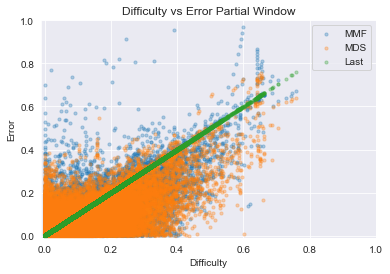

In [10]:
# we do a scatter plot of the difficulty of the problem vs the error of the model
# Also give a title to the plot and the axis
# Show the legend and also make sure the dots are a little see through and not too big

plt.scatter(difficulty, errorMMFFixed, label='MMF', alpha=0.3, s=10)
plt.scatter(difficulty, errorMDSFixed, label='MDS', alpha=0.3, s=10)
plt.scatter(difficulty, errorLastFixed, label='Last', alpha=0.3, s=10)
plt.title('Difficulty vs Error Partial Window')
plt.xlabel('Difficulty')
plt.ylabel('Error')
plt.ylim(-0.01, 1.0)
plt.xlim(-0.01, 1.0)
plt.legend()
plt.show()



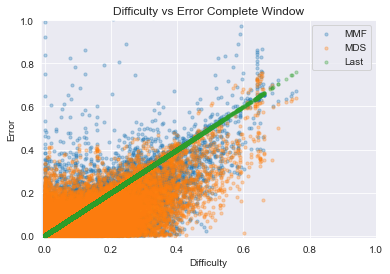

In [11]:
plt.scatter(difficulty, errorMMFAll, label='MMF', alpha=0.3, s=10)
plt.scatter(difficulty, errorMDSAll, label='MDS', alpha=0.3, s=10)
plt.scatter(difficulty, errorLastAll, label='Last', alpha=0.3, s=10)
plt.title('Difficulty vs Error Complete Window')
plt.xlabel('Difficulty')
plt.ylabel('Error')
plt.legend()
plt.ylim(-0.01, 1.0)
plt.xlim(-0.01, 1.0)
plt.show()

# 3. Analysis and conclusions
Where is it 0? outside of diagonal

In [121]:
rows, cols = np.indices((11,11))
row_vals = np.diag(rows, k=-1)
col_vals = np.diag(cols, k=-1)

In [126]:
difficulty[:,:,row_vals, col_vals] = np.nan

In [131]:
np.where(difficulty== 0)

(array([  2,   2,   2, ..., 247, 247, 247], dtype=int64),
 array([12, 12, 12, ...,  3, 16, 16], dtype=int64),
 array([0, 0, 0, ..., 0, 2, 3], dtype=int64),
 array([0, 1, 2, ..., 1, 2, 1], dtype=int64))

In [137]:
difficulty [247,16,:,:]

array([[0.0033, 0.0146, 0.0146, 0.0328, 0.0258, 0.0294, 0.0273, 0.0349,
        0.034 , 0.0467,    nan],
       [   nan, 0.0179, 0.0179, 0.0361, 0.0291, 0.0327, 0.0306, 0.0382,
        0.0373, 0.05  ,    nan],
       [0.0179,    nan, 0.    , 0.0182, 0.0112, 0.0148, 0.0127, 0.0203,
        0.0194, 0.0321,    nan],
       [0.0179, 0.    ,    nan, 0.0182, 0.0112, 0.0148, 0.0127, 0.0203,
        0.0194, 0.0321,    nan],
       [0.0361, 0.0182, 0.0182,    nan, 0.007 , 0.0034, 0.0055, 0.0021,
        0.0012, 0.0139,    nan],
       [0.0291, 0.0112, 0.0112, 0.007 ,    nan, 0.0036, 0.0015, 0.0091,
        0.0082, 0.0209,    nan],
       [0.0327, 0.0148, 0.0148, 0.0034, 0.0036,    nan, 0.0021, 0.0055,
        0.0046, 0.0173,    nan],
       [0.0306, 0.0127, 0.0127, 0.0055, 0.0015, 0.0021,    nan, 0.0076,
        0.0067, 0.0194,    nan],
       [0.0382, 0.0203, 0.0203, 0.0021, 0.0091, 0.0055, 0.0076,    nan,
        0.0009, 0.0118,    nan],
       [0.0373, 0.0194, 0.0194, 0.0012, 0.0082, 0.0046,

In [55]:
winFixed.data[247,16]

array([[0.53  , 0.5475, 0.5562, 0.5727, 0.585 , 0.5817, 0.5996, 0.5996,
        0.6178, 0.6108, 0.6144],
       [0.5475, 0.5562, 0.5727, 0.585 , 0.5817, 0.5996, 0.5996, 0.6178,
        0.6108, 0.6144, 0.6123],
       [0.5562, 0.5727, 0.585 , 0.5817, 0.5996, 0.5996, 0.6178, 0.6108,
        0.6144, 0.6123, 0.6199],
       [0.5727, 0.585 , 0.5817, 0.5996, 0.5996, 0.6178, 0.6108, 0.6144,
        0.6123, 0.6199, 0.619 ],
       [0.585 , 0.5817, 0.5996, 0.5996, 0.6178, 0.6108, 0.6144, 0.6123,
        0.6199, 0.619 , 0.6317]])

# 4. Conclusion
It seems like the trend of more difficulty more error is there in a linear fashion. It also seems like the constant of proportionality is a little under 1 for MDS and maybe MMF as can be seen by the Last method as its error is directly proportional to the difficulty measure used. This is good as it would mean that increasing the difficulty doesn't increase the error by as much.

Further, with this method the difficulty sometimes becomes 0 as two points that follow each other are equal in a window.